In [1]:
%matplotlib inline
import math
import time
import numpy as np
from myPkg import myPlot as d2l 
import scipy.io as sio
import os
from tqdm import tqdm


In [2]:
# data_path = r'F:\Github\BCI_Algorithms\result'
data_path = r'D:\Liuke\Git\BCI_Algorithms\result'


In [3]:
methods = ['TRCA',
           'TDCA',
           'TRCA-SAME',
           'TDCA-SAME',
           'MSeCCA',
           'MSTRCA',
           'TRCAR',
           'TRCA-MSSAME',
           'TDCA-MSSAME',
           'TDCA-gSAME',  
            'gTDCA',   

          ]

data = sio.loadmat(rf'{data_path}\TRCA\S1.mat')

methodNum  = methods.__len__()

print("数据类型")
data.keys()

数据类型


dict_keys(['__header__', '__version__', '__globals__', 'accs', 'itrs'])

In [4]:
accs = data['accs']
itrs = data['itrs']

In [5]:
# from matplotlib import pyplot as plt

# colors = plt.cm.viridis(np.linspace(0, 1, 12))  # 使用 viridis 颜色图
# str(colors[0])
# from matplotlib import colormaps
# list(colormaps)

S1的结果


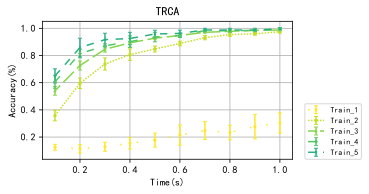

In [6]:
print("S1的结果")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[i,:,:].mean(0) for i in params ] ,
         [accs[i,:,:].std(0) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy(%)', 
         
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA"
        )

## TRCA

In [7]:
# Base path to your data files
base_path = rf'{data_path}\TRCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_trca = accs;
itr_trca = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3905.93it/s]


In [8]:
print(f"数据类型{accs.shape}")
# accs[:,4,:,:].mean(1).std(0)

数据类型(35, 5, 6, 10)


平均的结果
Accuracy


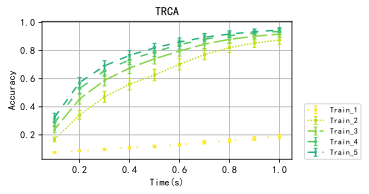

ITR


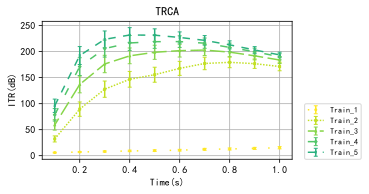

In [9]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA",
        saveName="算法对比/TRCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA",
        saveName="算法对比/TRCA_ITR"
        )

TRCA 0.5s  219.67 ± 12.47 bpm

TDCA 0.5s  244.34 ± 10.84 bpm  Nk = 7,  l = 4.

In [10]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.7658 ,ITR = 231.92 bit/min


## TDCA

In [11]:
# Base path to your data files
base_path = rf'{data_path}\TDCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)
acc_tdca = accs;
itr_tdca = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3905.93it/s]


平均的结果
Accuracy


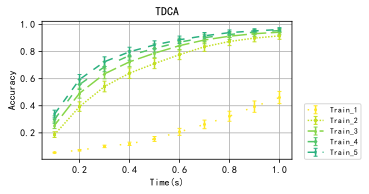

ITR


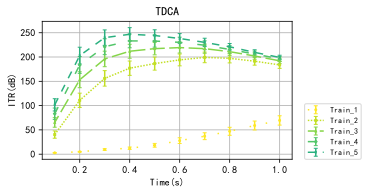

In [12]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA",
        saveName="算法对比/TDCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA",
        saveName="算法对比/TDCA_ITR"
        )

In [13]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.7985 ,ITR = 246.80 bit/min


Compare

## TRCA-SAME

In [14]:
# Base path to your data files
base_path = rf'{data_path}\TRCA-SAME'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)
acc_trca_same = accs;
itr_trca_same = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3906.35it/s]


平均的结果
Accuracy


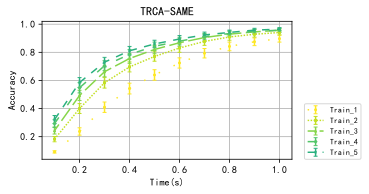

ITR


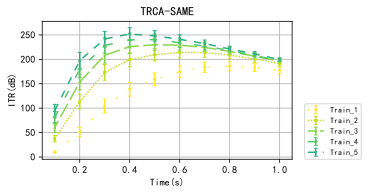

In [15]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA-SAME",
        saveName="算法对比/TRCA-SAME_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA-SAME",
        saveName="算法对比/TRCA-SAME_ITR"
        )

In [16]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.8111 ,ITR = 251.94 bit/min


## TDCA_SAME

In [17]:
# Base path to your data files
base_path = rf'{data_path}\TDCA-SAME'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_tdca_same = accs;
itr_tdca_same = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3906.04it/s]


平均的结果
Accuracy


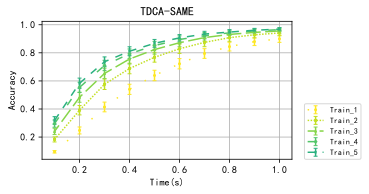

ITR


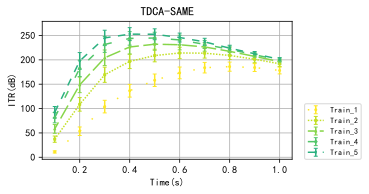

In [18]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA-SAME",
        saveName="算法对比/TDCA-SAME_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA-SAME",
        saveName="算法对比/TDCA-SAME_ITR"
        )

In [19]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.8113 ,ITR = 252.78 bit/min


## msTRCA

In [20]:
# Base path to your data files
base_path = rf'{data_path}\msTRCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_mstrca = accs;
itr_mstrca = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3906.14it/s]


平均的结果
Accuracy


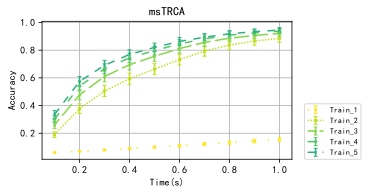

ITR


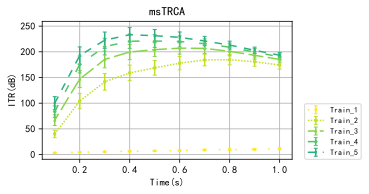

In [21]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="msTRCA",
        saveName="算法对比/msTRCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="msTRCA",
        saveName="算法对比/msTRCA_ITR"
        )

In [22]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.7694 ,ITR = 233.19 bit/min


## mseCCA

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3516.10it/s]

平均的结果
Accuracy


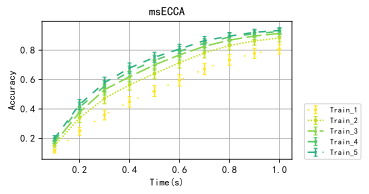

ITR


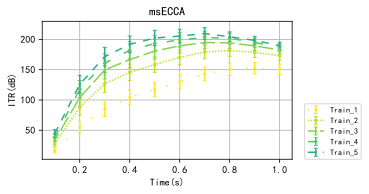

t = 0.7000000000000001 时,Acc = 0.8651 ,ITR = 209.79 bit/min


In [23]:
# Base path to your data files
base_path = rf'{data_path}\mseCCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_msecca = accs;
itr_msecca = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="msECCA",
        saveName="算法对比/msECCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="msECCA",
        saveName="算法对比/msECCA_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

## TRCAR

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3905.83it/s]

平均的结果
Accuracy


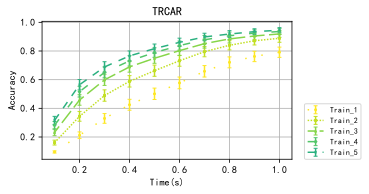

ITR


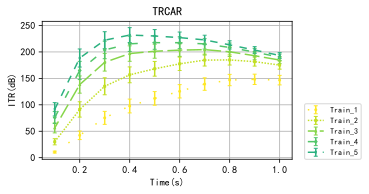

t = 0.4 时,Acc = 0.7658 ,ITR = 231.95 bit/min


In [24]:
# Base path to your data files
base_path = rf'{data_path}\TRCAR'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_trcaR= accs;
itr_trcaR = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCAR",
        saveName="算法对比/TRCAR_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCAR",
        saveName="算法对比/TRCAR_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

## TRCA-msSAME

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3515.59it/s]

平均的结果
Accuracy


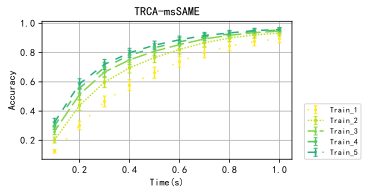

ITR


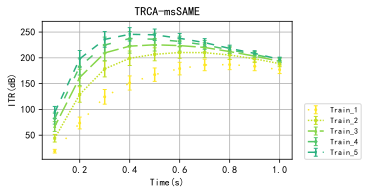

t = 0.4 时,Acc = 0.7988 ,ITR = 245.61 bit/min


In [25]:
# Base path to your data files
base_path = rf'{data_path}\TRCA-msSAME'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_trca_msSAME= accs;
itr_trca_msSAME = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA-msSAME",
        saveName="算法对比/TRCA-msSAME_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA-msSAME",
        saveName="算法对比/TRCA-msSAME_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

## TDCA-msSAME

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3905.93it/s]

平均的结果
Accuracy


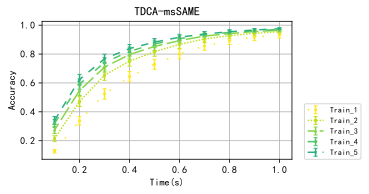

ITR


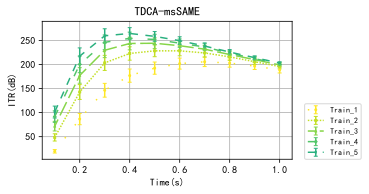

t = 0.4 时,Acc = 0.8382 ,ITR = 264.74 bit/min


In [26]:
# Base path to your data files
base_path = rf'{data_path}\TDCA-msSAME'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_tdca_msSAME= accs;
itr_tdca_msSAME = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA-msSAME",
        saveName="算法对比/TDCA-msSAME_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA-msSAME",
        saveName="算法对比/TDCA-msSAME_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

## TDCA-gSAME

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3195.49it/s]

平均的结果
Accuracy


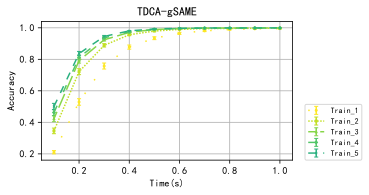

ITR


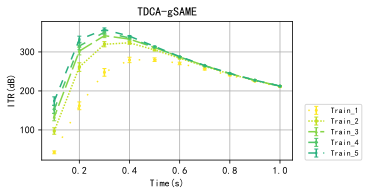

t = 0.30000000000000004 时,Acc = 0.9451 ,ITR = 357.35 bit/min


In [27]:
# Base path to your data files
base_path = rf'{data_path}\TDCA-gSAME'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_tdca_gSAME= accs;
itr_tdca_gSAME = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA-gSAME",
        saveName="算法对比/TDCA-gSAME_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA-gSAME",
        saveName="算法对比/TDCA-gSAME_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3905.83it/s]

平均的结果
Accuracy


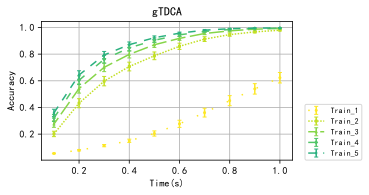

ITR


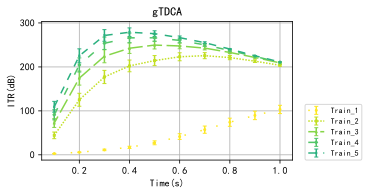

t = 0.4 时,Acc = 0.8711 ,ITR = 278.91 bit/min


In [28]:
# Base path to your data files
base_path = rf'{data_path}\gTDCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_gtdca= accs;
itr_gtdca = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="gTDCA",
        saveName="算法对比/gTDCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="gTDCA",
        saveName="算法对比/gTDCA_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

## All Result

In [35]:
all_acc=[]
all_acc.append( acc_trca)
all_acc.append( acc_tdca)
all_acc.append( acc_trca_same)
all_acc.append( acc_tdca_same)
all_acc.append( acc_msecca)
all_acc.append( acc_mstrca)
all_acc.append( acc_trcaR)
all_acc.append( acc_trca_msSAME)
all_acc.append( acc_tdca_msSAME)
# all_acc.append( acc_tdca_gSAME)
all_acc.append( acc_gtdca)
all_acc = np.array(all_acc)

all_itr=[]
all_itr.append( itr_trca)
all_itr.append( itr_tdca)
all_itr.append( itr_trca_same)
all_itr.append( itr_tdca_same)
all_itr.append( itr_msecca)
all_itr.append( itr_mstrca)
all_itr.append( itr_trcaR)
all_itr.append( itr_trca_msSAME)
all_itr.append( itr_tdca_msSAME)
# all_itr.append( itr_tdca_gSAME)
all_itr.append( itr_gtdca)

all_itr = np.array(all_itr)

In [36]:
all_acc.shape[0]

10

In [43]:
all_acc[8,:,0,:,:].mean( axis=(0,1))

array([0.12702381, 0.33830952, 0.52369048, 0.64371429, 0.72954762,
       0.80007143, 0.85592857, 0.89280952, 0.91711905, 0.93219048])

## Compare

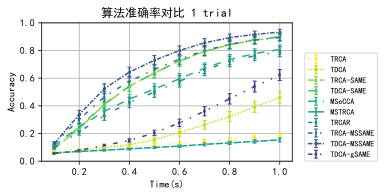

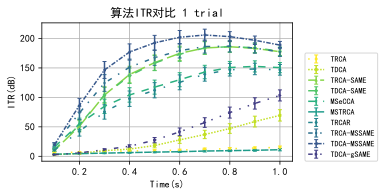

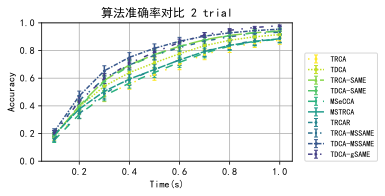

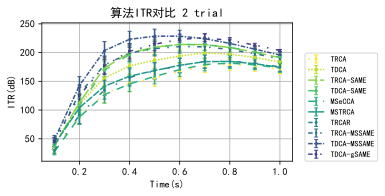

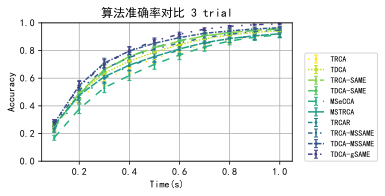

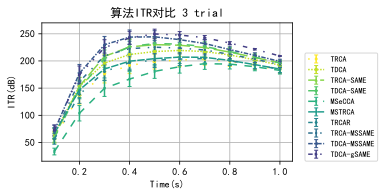

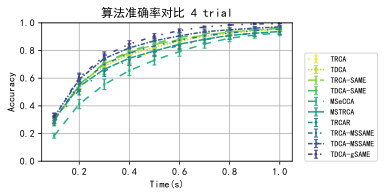

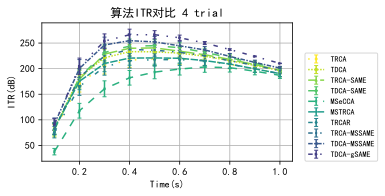

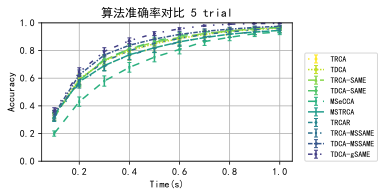

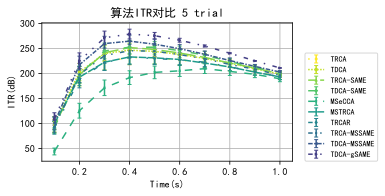

In [38]:
params =range(all_acc.shape[0])
for  n_train in range(5):
# n_train = 0
    time_points = np.linspace(0.1,1,10)
    d2l.plot(time_points,
             [all_acc[i,:,n_train,:,:].mean( axis=(0,1)) for i in params ] ,
             [all_acc[i,:,n_train,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
             xlabel='Time(s)',
             ylabel='Accuracy', 
             figsize=(4.5, 2.5),
             xlim=[0.05,1.05],
             ylim = [0 ,1],
             legend=[methods[mu] for mu in params],
             titles=f"算法准确率对比 {n_train+1} trial",
             saveName=f"算法对比/算法准确率对比{n_train+1}trial"
             )
    
    # print("ITR")
    d2l.plot(time_points,
             [all_itr[i,:,n_train,:,:].mean( axis=(0,1)) for i in params ] ,
             [all_itr[i,:,n_train,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
             xlabel='Time(s)',
             ylabel='ITR(dB)', 
             figsize=(4.5, 2.5),
             xlim=[0.05,1.05],
             legend=[methods[mu] for mu in params],
             titles=f"算法ITR对比 {n_train+1} trial",
             saveName=f"算法对比/算法ITR对比{n_train+1}trial"
             )